# Import all necessary libraries

In [2]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn

# import all losses
from loss.bce_loss import BCELoss
from loss.iou_loss import IoULoss
from loss.focal_loss import FocalLoss
from loss.dice_loss import DiceLoss
from loss.ss_loss import SSLoss

# import all models
from models.segnet import SegNet
from models.unet import UNet
from models.unet2 import UNet2

from dataset.dataset import PH2Dataset

# import all necessary function
from train import train
from eval import evaluate_plot
from utils import plot_history

In [3]:
img_size = (256, 256)
transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
])
split_ratio = (0.85, 0.15, 0)
root = 'dataset/PH2Dataset/PH2 Dataset images'
train_data = PH2Dataset(
    root=root,
    mode='train',
    transform=transform,
    split_ratio=split_ratio,
    download=True,
)

val_data = PH2Dataset(
    root=root,
    mode='val',
    split_ratio=split_ratio,
    transform=transform,
)

Downloading...
From: https://drive.google.com/uc?id=1uxB59F-sT-Cgqfxt0J0lMm7VZKcD1yuV
To: /content/dataset/PH2Dataset.zip
100%|██████████| 213M/213M [00:07<00:00, 27.5MB/s]


File downloaded successfully.
unzip done successfully you, unziped file dataset/PH2Dataset


#### Dataset has 200 images, and it divided into 170/30/0 as train/val/test

### Create DataLoaders

In [4]:
batch_size = 32
train_dataloader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True,
)

val_dataloader = DataLoader(
    val_data,
    batch_size=batch_size,
    shuffle=False,
)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# SegNet

### Try SegNet with different loss functions

In [6]:
# let's keep track of models
# model_name: {'model': model, 'history': history}
models = {}

## Let's train SegNet with BCELoss

In [7]:
epochs = 30
model = SegNet()
criterion = BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
dataloaders = {
    'train': train_dataloader,
    'val': val_dataloader,
}

history = train(model, epochs, criterion, optimizer, device, dataloaders)

models['segnet_bce_loss'] = {
    'model': model,
    'history': history,
}

Epoch 001/030 | train_loss: 0.64129 | val_loss: 0.67789 | val_iou: 0.23238 | val_dice: 0.37713
Epoch 002/030 | train_loss: 0.47800 | val_loss: 0.64011 | val_iou: 0.21665 | val_dice: 0.35614
Epoch 003/030 | train_loss: 0.37407 | val_loss: 0.55588 | val_iou: 0.22618 | val_dice: 0.36892
Epoch 004/030 | train_loss: 0.30500 | val_loss: 0.55049 | val_iou: 0.27225 | val_dice: 0.42798
Epoch 005/030 | train_loss: 0.27213 | val_loss: 0.26611 | val_iou: 0.58174 | val_dice: 0.73557
Epoch 006/030 | train_loss: 0.25796 | val_loss: 0.20193 | val_iou: 0.65116 | val_dice: 0.78873
Epoch 007/030 | train_loss: 0.20911 | val_loss: 0.18816 | val_iou: 0.66320 | val_dice: 0.79750
Epoch 008/030 | train_loss: 0.23031 | val_loss: 0.18358 | val_iou: 0.67933 | val_dice: 0.80905
Epoch 009/030 | train_loss: 0.22233 | val_loss: 0.19101 | val_iou: 0.64362 | val_dice: 0.78318
Epoch 010/030 | train_loss: 0.20505 | val_loss: 0.18010 | val_iou: 0.64381 | val_dice: 0.78331
Epoch 011/030 | train_loss: 0.20521 | val_loss: 0.

### Let's look at our plots

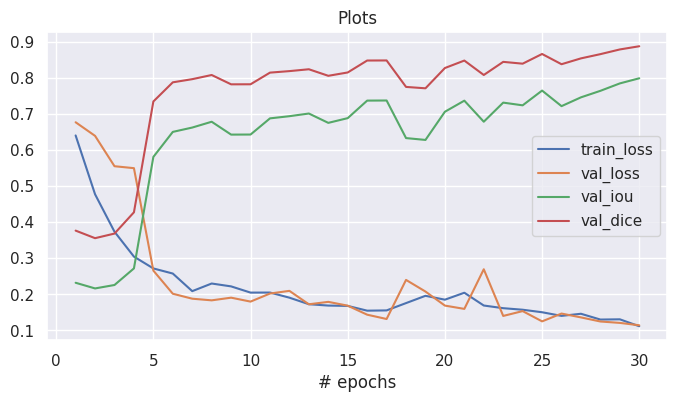

In [8]:
plot_history(history, plot=['train_loss', 'val_loss', 'val_iou', 'val_dice'], title='Plots', ylabel="")

### Let's look at our metrics on Test Set and predictions

Summary:
loss: 0.114374078810215
jaccard_index: 0.7999647855758667
dice_coef: 0.8888671398162842


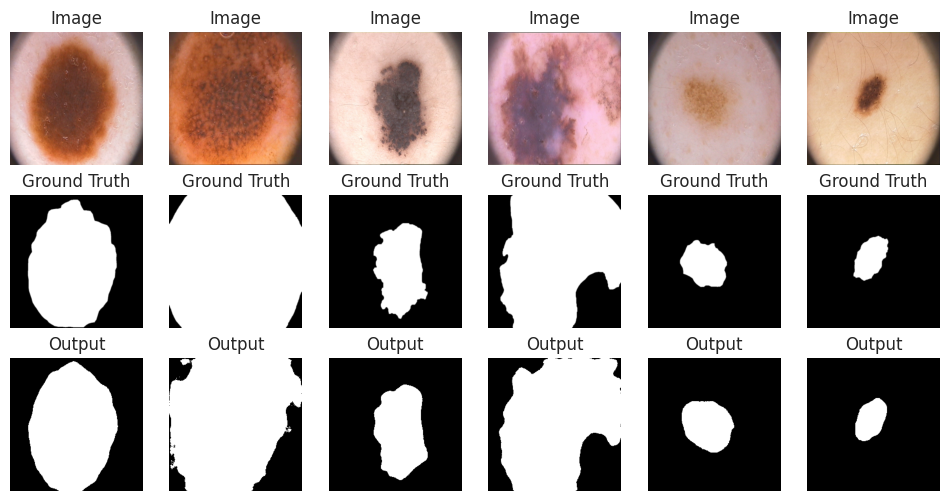

In [9]:
evaluate_plot(
    model,
    val_dataloader,
    loss=BCELoss(),
    device=device,
    num_plots=6
)

Actually not bad, our model learned a lot, that's good.

In [10]:
# empty memory from GPU
model.to('cpu')
torch.cuda.empty_cache()

## Let's train SegNet with DiceLoss

In [11]:
epochs = 30
model = SegNet()
criterion = DiceLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
dataloaders = {
    'train': train_dataloader,
    'val': val_dataloader,
}

history = train(model, epochs, criterion, optimizer, device, dataloaders)

models['segnet_dice_loss'] = {
    'model': model,
    'history': history,
}

Epoch 001/030 | train_loss: 0.53815 | val_loss: 0.61203 | val_iou: 0.24067 | val_dice: 0.38797
Epoch 002/030 | train_loss: 0.41499 | val_loss: 0.62469 | val_iou: 0.23101 | val_dice: 0.37531
Epoch 003/030 | train_loss: 0.36668 | val_loss: 0.64691 | val_iou: 0.21440 | val_dice: 0.35309
Epoch 004/030 | train_loss: 0.33795 | val_loss: 0.56904 | val_iou: 0.27466 | val_dice: 0.43096
Epoch 005/030 | train_loss: 0.30485 | val_loss: 0.35205 | val_iou: 0.47924 | val_dice: 0.64795
Epoch 006/030 | train_loss: 0.29671 | val_loss: 0.29359 | val_iou: 0.54609 | val_dice: 0.70641
Epoch 007/030 | train_loss: 0.27091 | val_loss: 0.26224 | val_iou: 0.58449 | val_dice: 0.73776
Epoch 008/030 | train_loss: 0.25074 | val_loss: 0.23496 | val_iou: 0.61948 | val_dice: 0.76504
Epoch 009/030 | train_loss: 0.24317 | val_loss: 0.20879 | val_iou: 0.65455 | val_dice: 0.79121
Epoch 010/030 | train_loss: 0.21869 | val_loss: 0.19475 | val_iou: 0.67399 | val_dice: 0.80525
Epoch 011/030 | train_loss: 0.21605 | val_loss: 0.

### Let's look at our plots

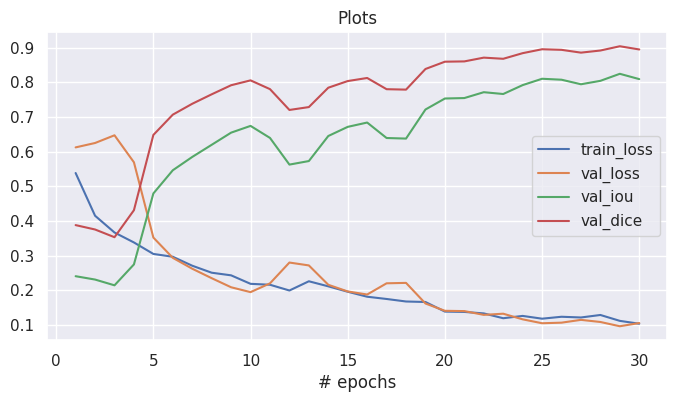

In [12]:
plot_history(history, plot=['train_loss', 'val_loss', 'val_iou', 'val_dice'], title='Plots', ylabel="")

### Let's look at our metrics on Test Set and predictions

Summary:
loss: 0.10567712783813477
jaccard_index: 0.8088462352752686
dice_coef: 0.8943228721618652


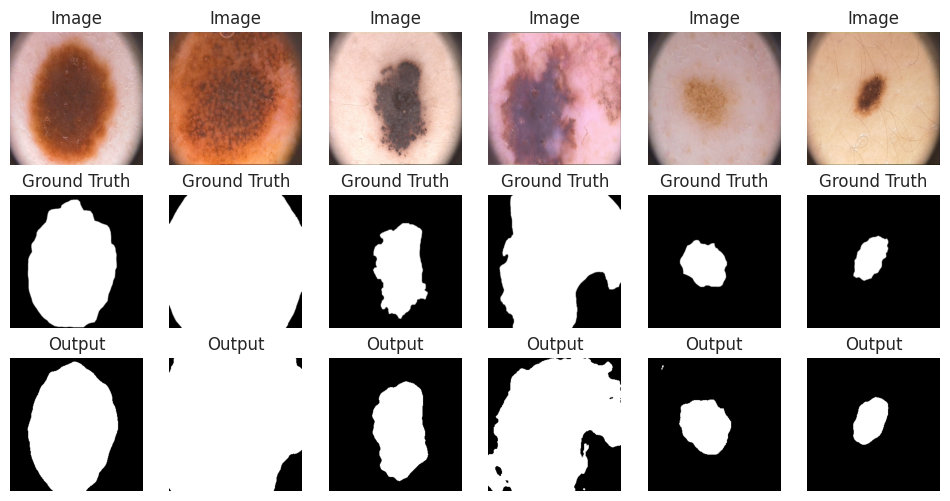

In [13]:
evaluate_plot(
    model,
    val_dataloader,
    loss=DiceLoss(),
    device=device,
    num_plots=6
)

In [14]:
# empty memory from GPU
model.to('cpu')
torch.cuda.empty_cache()

## Let's train SegNet with FocalLoss

In [15]:
epochs = 30
model = SegNet()
criterion = FocalLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
dataloaders = {
    'train': train_dataloader,
    'val': val_dataloader,
}

history = train(model, epochs, criterion, optimizer, device, dataloaders)

models['segnet_focal_loss'] = {
    'model': model,
    'history': history,
}

Epoch 001/030 | train_loss: 0.13247 | val_loss: 0.13994 | val_iou: 0.23820 | val_dice: 0.38475
Epoch 002/030 | train_loss: 0.10227 | val_loss: 0.12944 | val_iou: 0.22946 | val_dice: 0.37328
Epoch 003/030 | train_loss: 0.08735 | val_loss: 0.12617 | val_iou: 0.21473 | val_dice: 0.35354
Epoch 004/030 | train_loss: 0.06949 | val_loss: 0.14624 | val_iou: 0.19232 | val_dice: 0.32259
Epoch 005/030 | train_loss: 0.05477 | val_loss: 0.15747 | val_iou: 0.19783 | val_dice: 0.33032
Epoch 006/030 | train_loss: 0.04987 | val_loss: 0.11916 | val_iou: 0.26912 | val_dice: 0.42410
Epoch 007/030 | train_loss: 0.04743 | val_loss: 0.05908 | val_iou: 0.44399 | val_dice: 0.61495
Epoch 008/030 | train_loss: 0.04278 | val_loss: 0.05417 | val_iou: 0.39269 | val_dice: 0.56393
Epoch 009/030 | train_loss: 0.04502 | val_loss: 0.04170 | val_iou: 0.48900 | val_dice: 0.65682
Epoch 010/030 | train_loss: 0.04071 | val_loss: 0.04274 | val_iou: 0.44926 | val_dice: 0.61999
Epoch 011/030 | train_loss: 0.04127 | val_loss: 0.

### Let's look at our plots

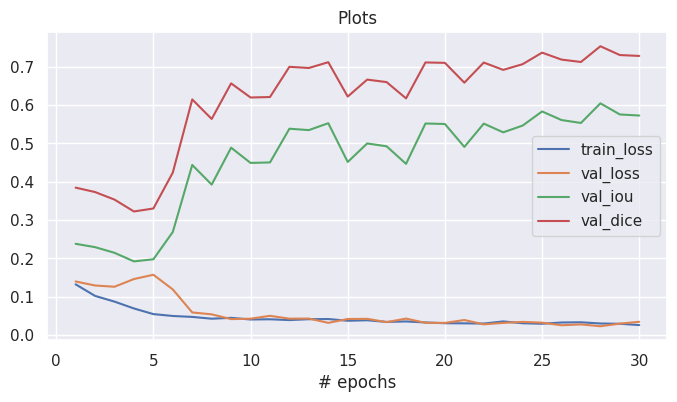

In [16]:
plot_history(history, plot=['train_loss', 'val_loss', 'val_iou', 'val_dice'], title='Plots', ylabel="")

### Let's look at our metrics on Test Set and predictions

Summary:
loss: 0.0347449891269207
jaccard_index: 0.5728988647460938
dice_coef: 0.7284625172615051


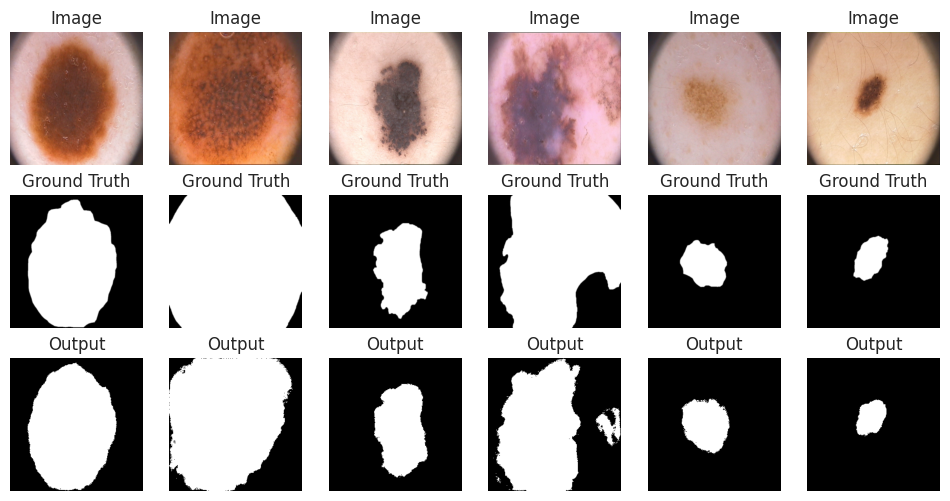

In [17]:
evaluate_plot(
    model,
    val_dataloader,
    loss=FocalLoss(),
    device=device,
    num_plots=6
)

In [18]:
# empty memory from GPU
model.to('cpu')
torch.cuda.empty_cache()

## Let's train SegNet with SSLoss

https://arxiv.org/pdf/1910.08711.pdf

In [19]:
epochs = 30
model = SegNet()
criterion = SSLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
dataloaders = {
    'train': train_dataloader,
    'val': val_dataloader,
}

history = train(model, epochs, criterion, optimizer, device, dataloaders)

models['segnet_ss_loss'] = {
    'model': model,
    'history': history,
}

Epoch 001/030 | train_loss: 0.20907 | val_loss: 0.63405 | val_iou: 0.23672 | val_dice: 0.38283
Epoch 002/030 | train_loss: 0.21024 | val_loss: 0.58017 | val_iou: 0.22820 | val_dice: 0.37160
Epoch 003/030 | train_loss: 0.13700 | val_loss: 0.58661 | val_iou: 0.21472 | val_dice: 0.35353
Epoch 004/030 | train_loss: 0.11820 | val_loss: 0.53693 | val_iou: 0.19828 | val_dice: 0.33093
Epoch 005/030 | train_loss: 0.08889 | val_loss: 0.26389 | val_iou: 0.27294 | val_dice: 0.42883
Epoch 006/030 | train_loss: 0.08125 | val_loss: 0.13155 | val_iou: 0.41163 | val_dice: 0.58320
Epoch 007/030 | train_loss: 0.07605 | val_loss: 0.07807 | val_iou: 0.49864 | val_dice: 0.66546
Epoch 008/030 | train_loss: 0.06876 | val_loss: 0.06373 | val_iou: 0.51183 | val_dice: 0.67710
Epoch 009/030 | train_loss: 0.05484 | val_loss: 0.05717 | val_iou: 0.51444 | val_dice: 0.67938
Epoch 010/030 | train_loss: 0.05760 | val_loss: 0.04471 | val_iou: 0.54501 | val_dice: 0.70551
Epoch 011/030 | train_loss: 0.05130 | val_loss: 0.

### Let's look at our plots

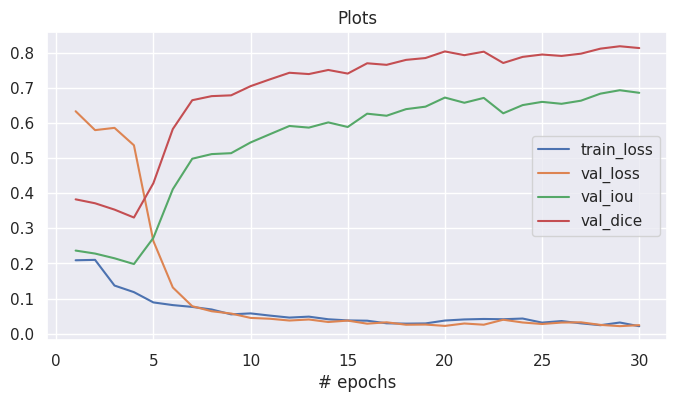

In [20]:
plot_history(history, plot=['train_loss', 'val_loss', 'val_iou', 'val_dice'], title='Plots', ylabel="")

### Let's look at our metrics on Test Set and predictions

Summary:
loss: 0.0240243561565876
jaccard_index: 0.6865732073783875
dice_coef: 0.8141635060310364


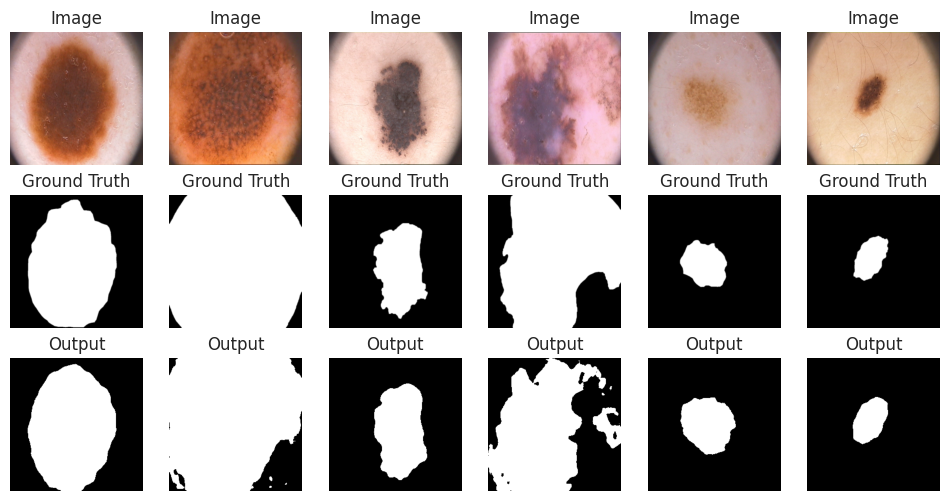

In [21]:
evaluate_plot(
    model,
    val_dataloader,
    loss=SSLoss(),
    device=device,
    num_plots=6
)

In [22]:
# empty memory from GPU
model.to('cpu')
torch.cuda.empty_cache()

# UNet


## Let's train UNet with BCELoss

In [23]:
epochs = 30
model = UNet()
criterion = BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
dataloaders = {
    'train': train_dataloader,
    'val': val_dataloader,
}

history = train(model, epochs, criterion, optimizer, device, dataloaders)

models['unet_bce_loss'] = {
    'model': model,
    'history': history,
}

Epoch 001/030 | train_loss: 0.53699 | val_loss: 0.66304 | val_iou: 0.23216 | val_dice: 0.37683
Epoch 002/030 | train_loss: 0.40300 | val_loss: 0.59645 | val_iou: 0.22618 | val_dice: 0.36892
Epoch 003/030 | train_loss: 0.34391 | val_loss: 0.54209 | val_iou: 0.23542 | val_dice: 0.38112
Epoch 004/030 | train_loss: 0.29683 | val_loss: 0.48978 | val_iou: 0.34183 | val_dice: 0.50950
Epoch 005/030 | train_loss: 0.26787 | val_loss: 0.31747 | val_iou: 0.49936 | val_dice: 0.66609
Epoch 006/030 | train_loss: 0.24393 | val_loss: 0.21524 | val_iou: 0.63425 | val_dice: 0.77620
Epoch 007/030 | train_loss: 0.22001 | val_loss: 0.23057 | val_iou: 0.65666 | val_dice: 0.79275
Epoch 008/030 | train_loss: 0.19516 | val_loss: 0.24322 | val_iou: 0.66841 | val_dice: 0.80125
Epoch 009/030 | train_loss: 0.19163 | val_loss: 0.14757 | val_iou: 0.73197 | val_dice: 0.84524
Epoch 010/030 | train_loss: 0.18418 | val_loss: 0.16009 | val_iou: 0.71143 | val_dice: 0.83139
Epoch 011/030 | train_loss: 0.16581 | val_loss: 0.

### Let's look at our plots for UNet

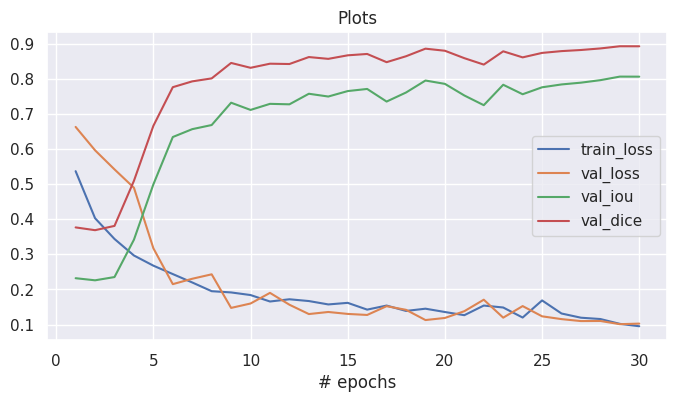

In [24]:
plot_history(history, plot=['train_loss', 'val_loss', 'val_iou', 'val_dice'], title='Plots', ylabel="")

### Let's look at our metrics on Test Set and predictions

Summary:
loss: 0.10284970700740814
jaccard_index: 0.8061561584472656
dice_coef: 0.8926761150360107


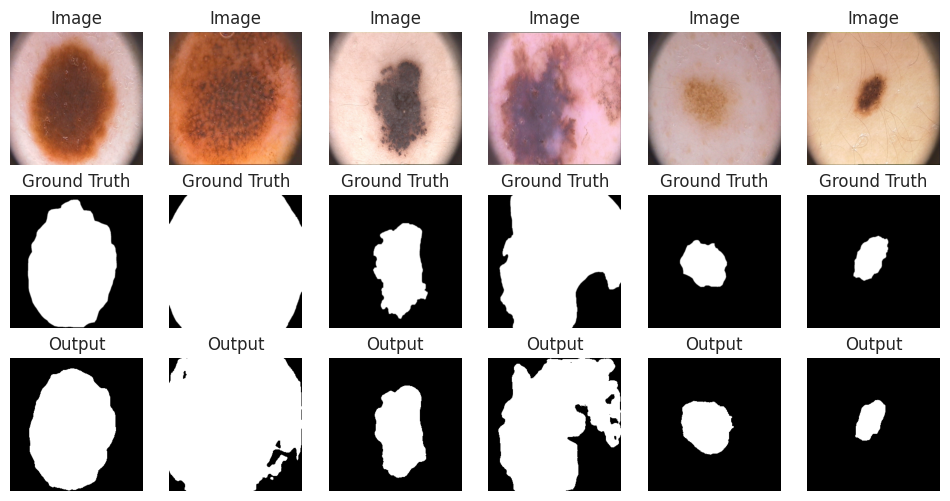

In [25]:
evaluate_plot(
    model,
    val_dataloader,
    loss=BCELoss(),
    device=device,
    num_plots=6
)

In [26]:
# empty memory from GPU
model.to('cpu')
torch.cuda.empty_cache()

## Let's train UNet with different loss function to compare them

In [27]:
epochs = 30
dataloaders = {
    'train': train_dataloader,
    'val': val_dataloader,
}

def lazy_train(criterion, model_name):
    model = UNet()
    optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
    history = train(model, epochs, criterion, optimizer, device, dataloaders, verbose=False)
    models[model_name] = {
        'model': model,
        'history': history,
    }
    # empty memory from GPU
    model.to('cpu')
    torch.cuda.empty_cache()

lazy_train(DiceLoss(), 'unet_dice_loss')
lazy_train(FocalLoss(), 'unet_focal_loss')
lazy_train(SSLoss(), 'unet_ss_loss')

# UNet2


## Let's train UNet2 with BCELoss

In [28]:
epochs = 30
model = UNet2()
criterion = BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
dataloaders = {
    'train': train_dataloader,
    'val': val_dataloader,
}

history = train(model, epochs, criterion, optimizer, device, dataloaders)

models['unet2_bce_loss'] = {
    'model': model,
    'history': history,
}

Epoch 001/030 | train_loss: 0.54729 | val_loss: 0.67745 | val_iou: 0.23435 | val_dice: 0.37971
Epoch 002/030 | train_loss: 0.39367 | val_loss: 0.60652 | val_iou: 0.22962 | val_dice: 0.37348
Epoch 003/030 | train_loss: 0.33402 | val_loss: 0.56775 | val_iou: 0.22124 | val_dice: 0.36232
Epoch 004/030 | train_loss: 0.32163 | val_loss: 0.42725 | val_iou: 0.40338 | val_dice: 0.57487
Epoch 005/030 | train_loss: 0.27992 | val_loss: 0.31473 | val_iou: 0.46991 | val_dice: 0.63937
Epoch 006/030 | train_loss: 0.26292 | val_loss: 0.24780 | val_iou: 0.59227 | val_dice: 0.74394
Epoch 007/030 | train_loss: 0.23043 | val_loss: 0.24078 | val_iou: 0.62434 | val_dice: 0.76873
Epoch 008/030 | train_loss: 0.24659 | val_loss: 0.19443 | val_iou: 0.62664 | val_dice: 0.77048
Epoch 009/030 | train_loss: 0.22326 | val_loss: 0.17441 | val_iou: 0.66777 | val_dice: 0.80080
Epoch 010/030 | train_loss: 0.21104 | val_loss: 0.18150 | val_iou: 0.67785 | val_dice: 0.80800
Epoch 011/030 | train_loss: 0.20558 | val_loss: 0.

### Let's look at our plots for UNet2

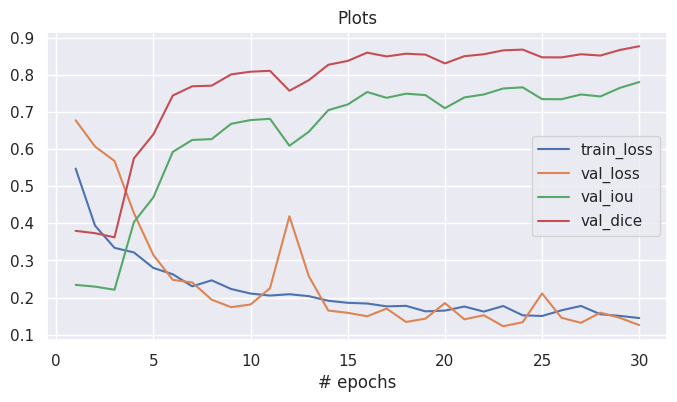

In [29]:
plot_history(history, plot=['train_loss', 'val_loss', 'val_iou', 'val_dice'], title='Plots', ylabel="")

### Let's look at our metrics on Test Set and predictions

Summary:
loss: 0.12609870731830597
jaccard_index: 0.780173122882843
dice_coef: 0.8765137791633606


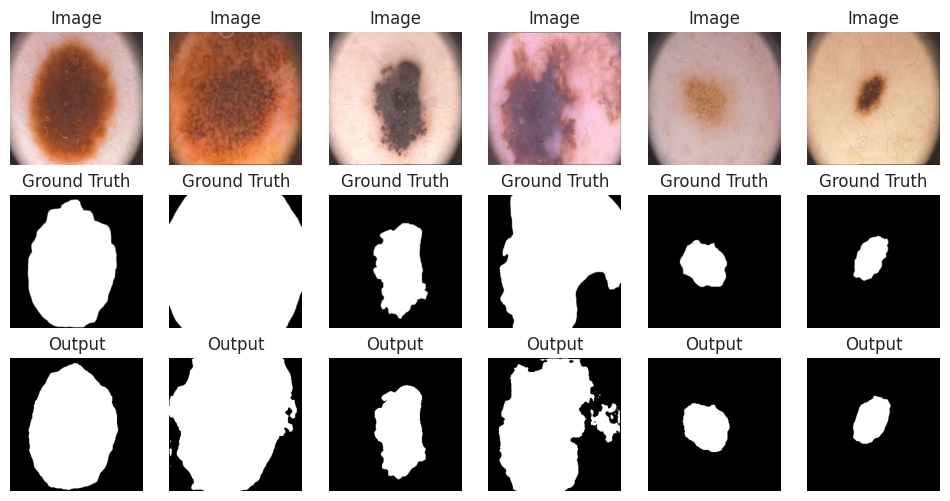

In [30]:
evaluate_plot(
    model,
    val_dataloader,
    loss=BCELoss(),
    device=device,
    num_plots=6
)

In [31]:
# empty memory from GPU
model.to('cpu')
torch.cuda.empty_cache()

## Let's train UNet2 with different loss function to compare them

In [32]:
epochs = 30
dataloaders = {
    'train': train_dataloader,
    'val': val_dataloader,
}

def lazy_train(criterion, model_name):
    model = UNet2()
    optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
    history = train(model, epochs, criterion, optimizer, device, dataloaders, verbose=False)
    models[model_name] = {
        'model': model,
        'history': history,
    }
    # empty memory from GPU
    model.to('cpu')
    torch.cuda.empty_cache()

lazy_train(DiceLoss(), 'unet2_dice_loss')
lazy_train(FocalLoss(), 'unet2_focal_loss')
lazy_train(SSLoss(), 'unet2_ss_loss')

# Summary

## Summary on models:
#### All three models learned very good, they indeed were able to catch some paterns in those images, and segmanted them very well. In general UNet is much powerfull than SegNet, nevertheless SegNet showed very good results.

## Summary on Loss functions is below:

## SegNet

### Plot of losses for SegNet

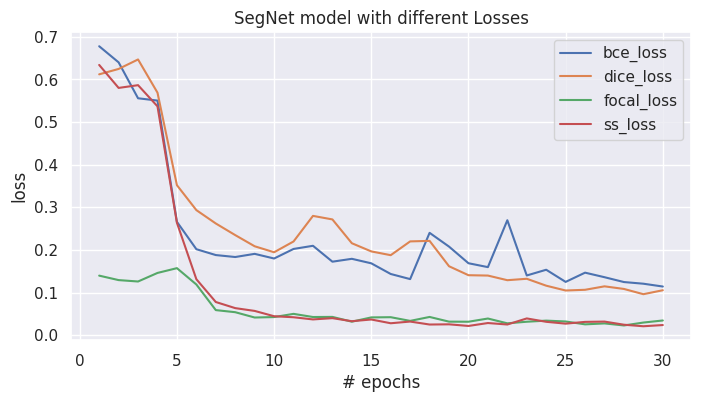

In [33]:
history = {
    'bce_loss': models['segnet_bce_loss']['history']['val_loss'],
    'dice_loss': models['segnet_dice_loss']['history']['val_loss'],
    'focal_loss': models['segnet_focal_loss']['history']['val_loss'],
    'ss_loss': models['segnet_ss_loss']['history']['val_loss']
}

plot_history(
    history,
    plot=list(history.keys()), # all losses in above dict
    title='SegNet model with different Losses',
    ylabel='loss'
)

### Plot of Jaccard Index (IoU - Intersection over Union) for SegNet

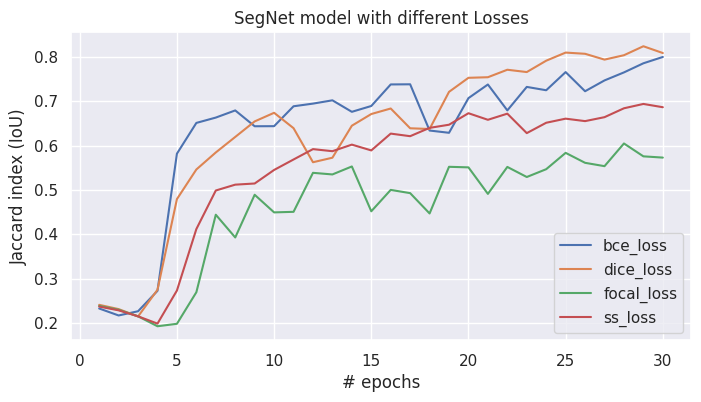

In [34]:
history = {
    'bce_loss': models['segnet_bce_loss']['history']['val_iou'],
    'dice_loss': models['segnet_dice_loss']['history']['val_iou'],
    'focal_loss': models['segnet_focal_loss']['history']['val_iou'],
    'ss_loss': models['segnet_ss_loss']['history']['val_iou']
}

plot_history(
    history,
    plot=list(history.keys()), # all losses in above dict
    title='SegNet model with different Losses',
    ylabel='Jaccard index (IoU)'
)

- BCELoss: not good metric for image segmantation, but got better IoU than FocalLoss (strange)
- DiceLoss: works pretty good
- FocalLoss: loss converged very fast, but problem with IoU stability
- SSLoss: loss and IoU functions are quite smooth, and loss decreases faster than DiceLoss

I would choose DiceLoss, because I got good IoU and it's more efficient in terms of computing than SSLoss.

## UNet


### Plot of Losses for UNet

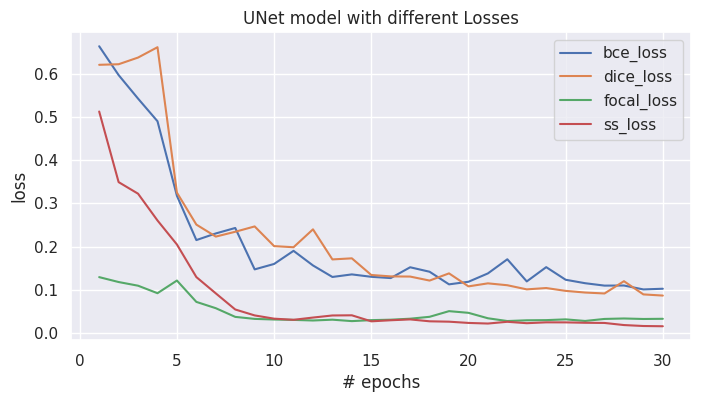

In [35]:
history = {
    'bce_loss': models['unet_bce_loss']['history']['val_loss'],
    'dice_loss': models['unet_dice_loss']['history']['val_loss'],
    'focal_loss': models['unet_focal_loss']['history']['val_loss'],
    'ss_loss': models['unet_ss_loss']['history']['val_loss']
}

plot_history(
    history,
    plot=list(history.keys()), # all losses in above dict
    title='UNet model with different Losses',
    ylabel='loss'
)

### Plot of Jaccard Index (IoU - Intersection over Union) for UNet

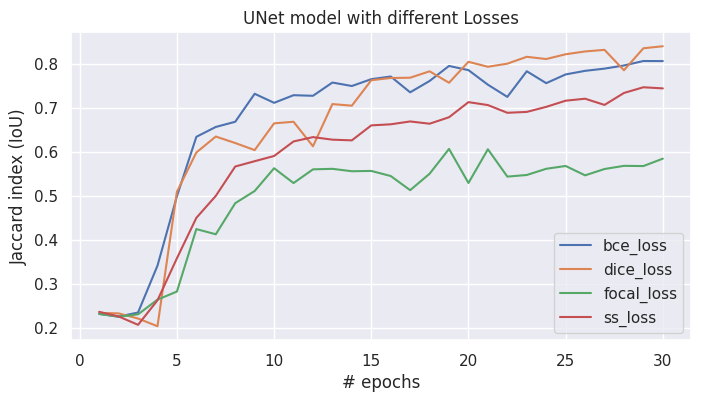

In [36]:
history = {
    'bce_loss': models['unet_bce_loss']['history']['val_iou'],
    'dice_loss': models['unet_dice_loss']['history']['val_iou'],
    'focal_loss': models['unet_focal_loss']['history']['val_iou'],
    'ss_loss': models['unet_ss_loss']['history']['val_iou']
}

plot_history(
    history,
    plot=list(history.keys()), # all losses in above dict
    title='UNet model with different Losses',
    ylabel='Jaccard index (IoU)'
)

- BCELoss: not good metric for image segmantation, but it worked not that bad
- DiceLoss: got highest IoU in 30 epochs, loss converged slower than FocalLoss and SSLoss
- FocalLoss: loss function converged very fast, but for 30 epochs got the smallest IoU
- SSLoss: loss function converged fast, but IoU is not the best, maybe it would be after training more epochs because IoU is slowly increasing

I would choose DiceLoss, because I got good IoU and it's more efficient in terms of computing than others.

## UNet2

### Plot of Losses for UNet2

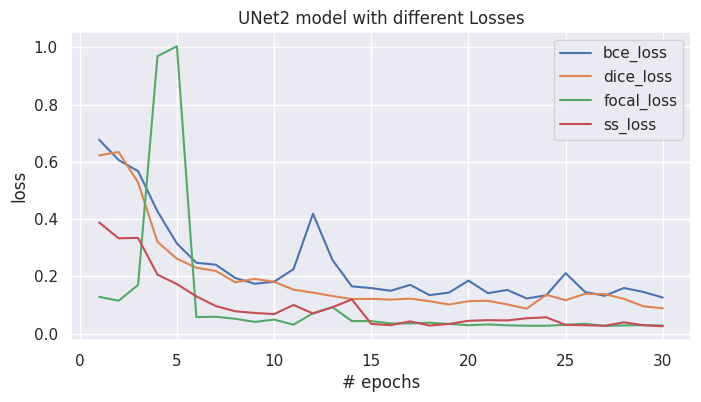

In [39]:
history = {
    'bce_loss': models['unet2_bce_loss']['history']['val_loss'],
    'dice_loss': models['unet2_dice_loss']['history']['val_loss'],
    'focal_loss': models['unet2_focal_loss']['history']['val_loss'],
    'ss_loss': models['unet2_ss_loss']['history']['val_loss']
}

plot_history(
    history,
    plot=list(history.keys()), # all losses in above dict
    title='UNet2 model with different Losses',
    ylabel='loss'
)

### Plot of Jaccard Index (IoU - Intersection over Union) for UNet2

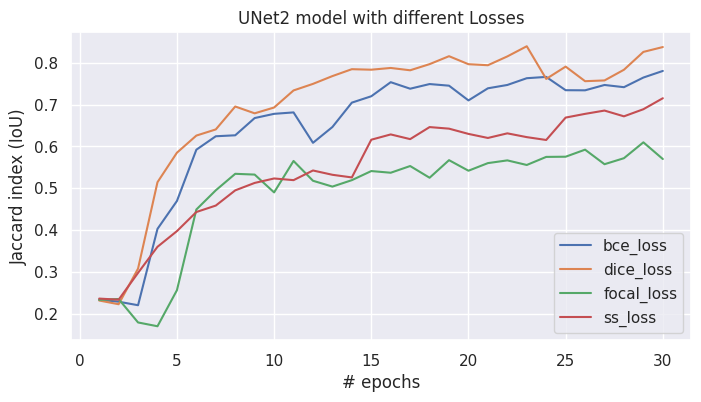

In [38]:
history = {
    'bce_loss': models['unet2_bce_loss']['history']['val_iou'],
    'dice_loss': models['unet2_dice_loss']['history']['val_iou'],
    'focal_loss': models['unet2_focal_loss']['history']['val_iou'],
    'ss_loss': models['unet2_ss_loss']['history']['val_iou']
}

plot_history(
    history,
    plot=list(history.keys()), # all losses in above dict
    title='UNet2 model with different Losses',
    ylabel='Jaccard index (IoU)'
)

- BCELoss: keep saying not good metric for image segmantation, but it's better than two other loss functions in terms of IoU, maybe I'm wrong 😱
- DiceLoss: loss function converge slow but it got the highest IoU
- FocalLoss: loss function converges fast but it has low IoU
- SSLoss: loss function converges fast but it has low IoU, maybe we will get higher IoU by training more epochs

# You made it till the end, Thank you for your attention 😉